In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install joypy
!pip install squarify
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.mosaicplot import mosaic
from joypy import joyplot #!pip install joypy
import squarify # pip install squarify
import plotly.express as px # pip install plotly

# Visualizing Associations Among Two or More Quantitative Variables

- Scatter Plot
- Correlograms
- Slopegraphs

# Dataset

https://www.kaggle.com/uciml/pima-indians-diabetes-database

https://www.kaggle.com/ronitf/heart-disease-uci

In [4]:
filename="/content/drive/MyDrive/Data Science/data/Class-5/diabetes.csv"
data=pd.read_csv(filename)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Scatter Plot

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome       I/G  
3                       0.167   21        0  1.056180  

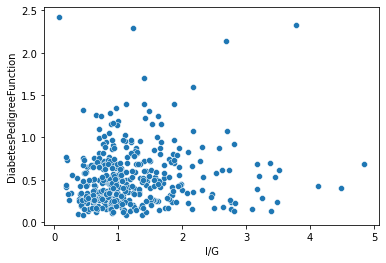

In [6]:
clean_data=data[data["BMI"]!=0]
clean_data=clean_data[clean_data["Insulin"]!=0]
clean_data["I/G"]=(clean_data["Insulin"]/clean_data["Glucose"]).to_list()
print(clean_data)

sns.scatterplot(
    data=clean_data, x="I/G", y="DiabetesPedigreeFunction", 
    sizes=(20, 200), legend="full"
)


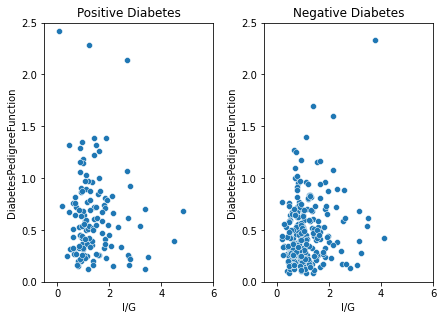

In [ ]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(
    data=clean_data[clean_data["Outcome"]==1], x="I/G", y="DiabetesPedigreeFunction", 
    sizes=(20, 200),ax=axes[0]
)
axes[0].set_title("Positive Diabetes")
axes[0].set_ylim(0,2.5)
axes[0].set_xlim(-0.5,6)
sns.scatterplot(
    data=clean_data[clean_data["Outcome"]==0], x="I/G", y="DiabetesPedigreeFunction", 
    sizes=(20, 200),ax=axes[1]
)
axes[1].set_title("Negative Diabetes")
axes[1].set_ylim(0,2.5)
axes[1].set_xlim(-0.5,6)
# set the spacing between subplots
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.5)


# Correlogram

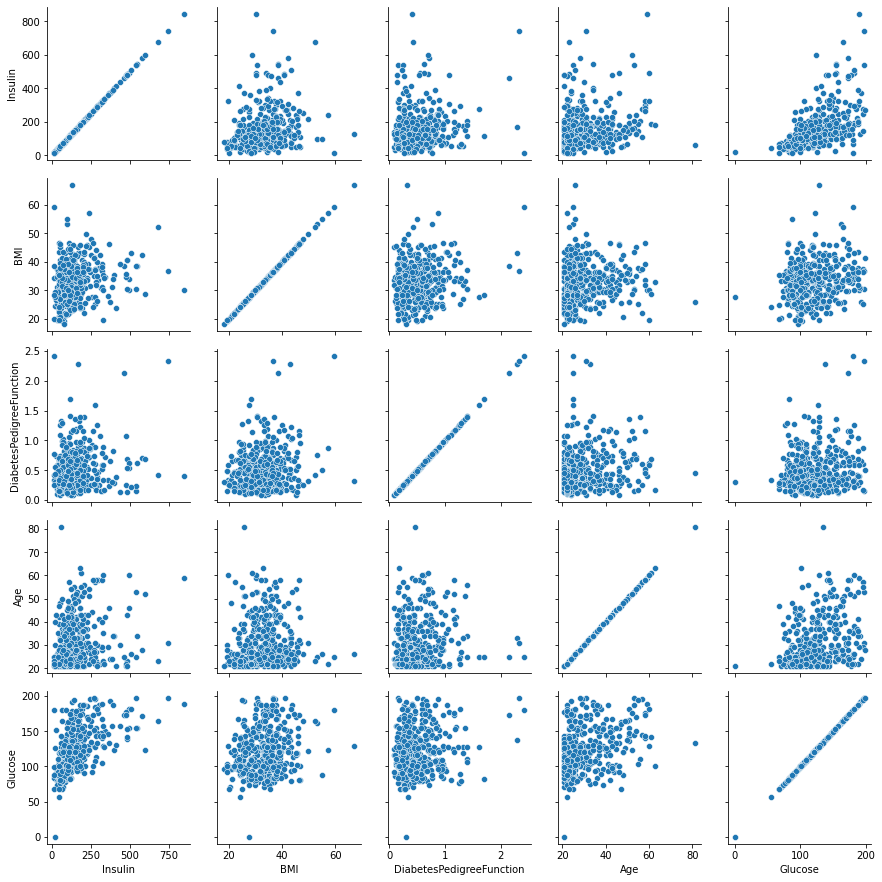

In [ ]:
g = sns.PairGrid(clean_data[["Insulin","BMI","DiabetesPedigreeFunction","Age","Glucose"]])
g.map(sns.scatterplot)

In [ ]:
clean_data.iloc[:,:-1].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.201404,0.212708,0.094646,0.080848,-0.023913,0.008737,0.680120,0.257521
Glucose,0.201404,1.000000,0.203248,0.203415,0.580060,0.212877,0.143807,0.346122,0.512289
BloodPressure,0.212708,0.203248,1.000000,0.231734,0.097584,0.303626,-0.016403,0.298997,0.192055
SkinThickness,0.094646,0.203415,0.231734,1.000000,0.184211,0.664916,0.161694,0.169541,0.257086
Insulin,0.080848,0.580060,0.097584,0.184211,1.000000,0.228050,0.137465,0.219232,0.302763
BMI,-0.023913,0.212877,0.303626,0.664916,0.228050,1.000000,0.159833,0.071566,0.271120
DiabetesPedigreeFunction,0.008737,0.143807,-0.016403,0.161694,0.137465,0.159833,1.000000,0.086479,0.210248
Age,0.680120,0.346122,0.298997,0.169541,0.219232,0.071566,0.086479,1.000000,0.351897
Outcome,0.257521,0.512289,0.192055,0.257086,0.302763,0.271120,0.210248,0.351897,1.000000


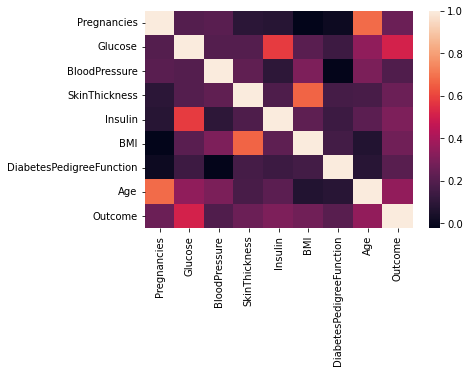

In [ ]:
ax = sns.heatmap(clean_data.iloc[:,:-1].corr(),
                 #annot=True, 
                )

# Slop chart

In [7]:
filename="/content/drive/MyDrive/Data Science/data/Class-5/Growth_of_Coastal_Fleet_By_Type_of_Vessels_ason_31st_Dec_2014.csv"
data=pd.read_csv(filename)
#data["Year"]=data["Year"].astype(str)
data=data[data["Item"]=="No. of Vessels"]
data=data.iloc[-25:,[0,3,4,5,6]]
data.columns=["Year",'Dry Cargo Bulk Carrier', 'Oil Tanker', 'Passenger-cum-Cargo',
       'Off-shore Supply']
#data["Total"]=data.sum(axis=1)
data

,Year,Dry Cargo Bulk Carrier,Oil Tanker,Passenger-cum-Cargo,Off-shore Supply
30,1990,6.0,15.0,14.0,63.0
33,1991,10.0,18.0,13.0,63.0
36,1992,20.0,16.0,12.0,67.0
39,1993,23.0,16.0,12.0,73.0
42,1994,13.0,17.0,13.0,74.0
45,1995,13.0,18.0,15.0,73.0
48,1996,12.0,17.0,15.0,71.0
51,1997,11.0,14.0,15.0,68.0
54,1998,12.0,15.0,15.0,69.0
57,1999,12.0,16.0,22.0,68.0


Text(0.0, 1.0, 'Change in number of vessels')

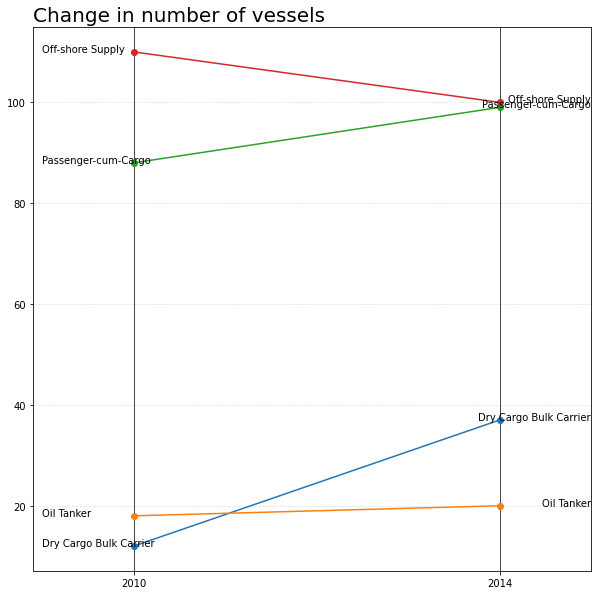

In [ ]:
vessels = [
         "Dry Cargo Bulk Carrier",
         "Oil Tanker",
         "Passenger-cum-Cargo",
         "Off-shore Supply"
          ]
data=data[data["Year"].isin([2010,2014])]

fig, ax = plt.subplots(1, figsize=(10,10))
# grid
ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)

for i,nm in enumerate(vessels):
    plt.plot(data.Year, data[nm],marker='o')
    plt.text(data.Year.values[0]-1.0, data[nm].values[0], nm)
    plt.text(data.Year.values[1]+1.0, data[nm].values[1], nm, ha='right')
    
plt.xlim(2008.9,2015)
plt.xticks([2010, 2014])

plt.title("Change in number of vessels", loc='left', fontsize=20)